# Worksheet 7

In [1]:
%matplotlib inline

# Questions

## Question 1

Find the linear system that results from using central differencing to solve the elliptic equation

$$
    u_{xx} + u_{yy} = \sin ( \pi y ) \left( 2 - 6 x - (\pi x)^2 (1 - x) \right).
$$

Central differencing, trivial boundary conditions, and a $3 \times 2$ grid should be used.

## Question 2

Explain the strategy for solving evolutionary PDEs using finite differencing methods.

## Question 3

Write out a FTCS method for the equations

$$
\begin{aligned}
    \partial_t y - \partial_{xx} y & = \sin(x), & x & \in [0,1], &
    y(t, 0) & = 0 = y(t, 1), \\
    \partial_t y + \partial_{x} y & = e^{-(x-1/2)^2}, & x & \in [0,1], &
    y(t, 0) & = 0 = y(t, 1).
\end{aligned}
$$

In both cases the initial data should be taken to be $y(0, x) = f(x)$. Full details of the grid, the discrete initial and boundary conditions, and the discrete update algorithm should be given.

## Question 4

Using von Neumann analysis, find when the BTCS method is stable for the advection equation.

## Coding Question 1

Implement the finite difference method above to solve the elliptic equation

$$
    u_{xx} + u_{yy} = \sin ( \pi y ) \left( 2 - 6 x - (\pi x)^2 (1 -
      x) \right).
$$

Check how it converges with resolution (the exact solution is $u = x^2 (1 - x) \sin(\pi y)$).

## Coding Question 2

Implement a FTBS algorithm for the advection equation with periodic boundaries. Use a sine wave on $x \in [0,1]$ as initial data. Check how it converges with resolution.

## Coding Question 3

Apply the FTBS algorithm to the traffic flow equation

$$
    \partial_t y + \partial_x \left( y ( 1 - y) \right) = 0.
$$

Use initial data $y(0, x) = \exp(-x^2)$, $y(0, x) = 0.2 + 1.2 H(x)$ and $y(0, x) = 1 - H(x)$ on $x \in [-10, 10]$ where $H(x)$ is the Heaviside step function. By comparing against the results for Burger's equation, explain your results. You may want to restrict to $t \leq 0.5$.

# Answers

## Question 1

Find the linear system that results from using central differencing to solve the elliptic equation

$$
    u_{xx} + u_{yy} = \sin ( \pi y ) \left( 2 - 6 x - (\pi x)^2 (1 - x) \right).
$$

Central differencing, trivial boundary conditions, and a $3 \times 2$ grid should be used.

### Answer Question 1

The question is incomplete as it does not specify the spatial domain. However, it is reasonably to expect it to be the unit square $(x, y) \in [0, 1]^2$. So we first specify the grid using the coordinates

$$
\begin{aligned}
  x_i & = i h_x & i & = 0, \dots, 4, & h_x & = \frac{1}{4}, \\
  y_j & = j h_y & j & = 0, \dots, 3, & h_y & = \frac{1}{3}.
\end{aligned}
$$

This gives an evenly spaced grid with 3 interior points in $x$ and 2 interior points in $y$. The boundary conditions are imposed as

$$
\begin{aligned}
  u_{0, j} & = 0, & u_{4, j} & = 0, \\
  u_{i, 0} & = 0, & u_{i, 3} & = 0.
\end{aligned}
$$

We are of course using the notation $u_{i,j} \approx u(x_i, y_j)$.

We use central differencing at all interior points to get

$$
\begin{aligned}
  u_{xx} & \approx \frac{u_{i+1,j} + u_{i-1,j} - 2 u_{i,j}}{h_x^2}, \\
  u_{yy} & \approx \frac{u_{i,j+1} + u_{i,j-1} - 2 u_{i,j}}{h_y^2}.
\end{aligned}
$$

We then substitute these approximations into the differential equation to find the difference equation satisfied at all interior points,

$$
  \left(u_{i+1,j} + u_{i-1,j} - 2 u_{i,j} \right) + \left(\frac{h_x}{h_y} \right)^2 \left( u_{i,j+1} + u_{i,j-1} - 2 u_{i,j} \right) = h_x^2 \sin ( \pi y_j ) \left( 2 - 6 x_i - (\pi x_i)^2 (1 - x_i) \right).
$$
  
We will write $h_x / h_y = \alpha$.

We choose natural ordering by rows to write the unknowns $u_{i,j}$ as a vector ${\bf u}$ as

$$
  {\bf u} = \left[ u_{1,1}, u_{1,2}, u_{2,1}, u_{2,2}, u_{3,1}, u_{3,2} \right]^T.
$$

It then follows that the matrix that defines the system has the form

$$
  A =
    \begin{pmatrix}
      -2 ( 1 + \alpha ) & \alpha & 1 & 0 & 0 & 0 \\
      \alpha & -2 ( 1 + \alpha ) & 0 & 1 & 0 & 0 \\
      1 & 0 & -2 ( 1 + \alpha ) & 1 & \alpha & 0 \\
      0 & 1 & \alpha & -2 ( 1 + \alpha ) & 0 & 1 \\
      0 & 0 & 1 & 0 & -2 ( 1 + \alpha ) & \alpha \\
      0 & 0 & 0 & \alpha & 1 &  -2 ( 1 + \alpha ) 
    \end{pmatrix}
$$

and the right hand side vector is solely in terms of the right hand side data
  
$$
    h_x^2 \sin ( \pi y_j ) \left( 2 - 6 x_i - (\pi x_i)^2 (1 - x_i) \right)
$$

as all the boundary data is trivial.

## Question 2

Explain the strategy for solving evolutionary PDEs using finite differencing methods.

### Answer Question 2

The domain is discretized using a set of points in space. These points will usually be evenly spaced with a (representative) step length $h$. The grid is extended to cover the time domain as well by discretizing time using a time step $\delta$. The derivatives defining the differential equation are replaced with finite difference approximations, the initial data fixes the unknowns at the initial time, and the boundary conditions imposed using equivalent (or consistent) discrete boundary data. This implies a finite difference formula which gives the unknown data at timestep $n+1$ in terms of the known data at timestep $n$ and the boundary data. 

Depending on the finite difference formula derived, there may be a relation between the time step $\delta$ and space step $h$ for which the algorithm is stable and convergent, which can be checked using von Neumann analysis.

## Question 3

Write out a FTCS method for the equations

$$
\begin{aligned}
    \partial_t y - \partial_{xx} y & = \sin(x), & x & \in [0,1], &
    y(t, 0) & = 0 = y(t, 1), \\
    \partial_t y + \partial_{x} y & = e^{-(x-1/2)^2}, & x & \in [0,1], &
    y(t, 0) & = 0 = y(t, 1).
\end{aligned}
$$

In both cases the initial data should be taken to be $y(0, x) = f(x)$. Full details of the grid, the discrete initial and boundary conditions, and the discrete update algorithm should be given.

### Answer Question 3

We shall use $N+1$ points in space, denoted $x_i = i h$ with $i = 0,  \dots, N$ and the space step $h = 1 / N$; this is an evenly spaced grid with boundary points $x_0 = 0$ and $x_N = 1$. We will also  discretize time using $t^n = n \delta$ where $\delta$, the timestep, is unconstrained. We will denote our approximate solution at $(x, t) = (x_i, t^n)$ as $y_i^n \approx y(x_i, t^n)$.

The initial data will be imposed by the equivalent discrete condition $y_i^0 = f(x_i)$. The (trivial Dirichlet) boundary conditions to be imposed in both cases will be given by the discrete conditions

$$
    y_0^n = 0, \qquad y_N^n = 0, \qquad \forall n \ge 0.
$$

To form the discrete update algorithm we use forward differencing in time (FT),

$$
    y_t|_{x=x_i, t = t^n} \approx \frac{y_i^{n+1} - y_i^{n}}{\delta},
$$

and central differencing in space (CS), 

$$
\begin{aligned}
    y_x|_{x=x_i, t = t^n} & \approx \frac{y_{i+1}^{n} - y_{i-1}^{n}}{2
      h}, \\
    y_{xx}|_{x=x_i, t = t^n} & \approx \frac{y_{i+1}^{n} + y_{i-1}^{n}
      - 2 y_i^n}{h^2}.
\end{aligned}
$$

We then replace the derivatives in the PDE with the finite difference approximations and rearrange, to get for the heat equation

$$
\begin{aligned}
    \frac{y_i^{n+1} - y_i^{n}}{\delta} - \frac{y_{i+1}^{n} + y_{i-1}^{n}
      - 2 y_i^n}{h^2} & = \sin(x_i) \\
    \Rightarrow \qquad y_i^{n+1} &= y_i^n + \delta \sin(x_i) + s \left(
      y_{i+1}^{n} + y_{i-1}^{n} - 2 y_i^n \right),
\end{aligned}
$$

where $s = \delta / h^2$, and for the advection equation

$$
\begin{aligned}
    \frac{y_i^{n+1} - y_i^{n}}{\delta} + \frac{y_{i+1}^{n} -
      y_{i-1}^{n}}{2 h} & = e^{-(x_i - 1/2)^2} \\
    \Rightarrow \qquad y_i^{n+1} & = y_i^n + \delta e^{-(x_i - 1/2)^2}
    - c \left( y_{i+1}^n - y_{i-1}^n \right)
\end{aligned}
$$

where $c = \delta / (2 h)$. In both cases these equations hold for the interior points $n \ge 0$ and $i = 1, \dots, N-1$. The boundary points are set using the above initial and boundary data.

## Question 4

Using von Neumann analysis, find when the BTCS method is stable for the advection equation.

### Answer Question 4

The finite difference formula for the BTCS method for the advection equation

$$
    \partial_t y + v \partial_x y = 0
$$

is straightforwardly checked to be

$$
    y_i^{n+1} = y_i^n - c \left( y_{i+1}^{n+1} - y_{i-1}^{n+1} \right)
$$

where the convection number $c = v \delta / (2 h)$ with $\delta$ the timestep and $h$ the space step. 

We use the standard von Neumann analysis ansatz, which is that $y_{\ell}^k = q^k e^{\alpha \ell j h}$ where $q$ is the (unknown) growth rate to be found, $\alpha$ is related to the frequency of the (generic) initial data (and hence can take any real value), $h$ is the space step and $j = \sqrt{-1}$.

Identifying $\ell \leftrightarrow i$ and $k \leftrightarrow n$ and substituting the ansatz into the finite difference equation we see that

$$
    q = 1 - q c \left( e^{\alpha j h} - e^{- \alpha j h} \right).
$$

which can be written as

$$
\begin{aligned}
    q & = 1 - 2 j q c \sin \left(\alpha h \right) \\
    \Rightarrow \qquad q & = \frac{1}{1 + 2 j c \sin \left( \alpha h
      \right)} \\
    \Rightarrow \qquad |q|^2 & = \left| \frac{1 - 2 j c \sin \left(
          \alpha h \right)}{1 + 4 c^2 \sin^2 \left( \alpha h \right)}
    \right|^2 \\
    & = \frac{1 + 4 c^2 \sin^2 \left( \alpha h \right)}{\left[ 1 + 4
        c^2 \sin^2 \left( \alpha h \right) \right]^2} \\
    & = \frac{1}{1 + 4 c^2 \sin^2 \left( \alpha h \right)} \\
    & \le 1 \qquad \forall \alpha.
\end{aligned}
$$

Therefore BTCS is unconditionally stable for the advection equation.

## Coding Question 1

Implement the finite difference method above to solve the elliptic equation

$$
    u_{xx} + u_{yy} = \sin ( \pi y ) \left( 2 - 6 x - (\pi x)^2 (1 -
      x) \right).
$$

Check how it converges with resolution (the exact solution is $u = x^2 (1 - x) \sin(\pi y)$).

### Answer Coding Question 1

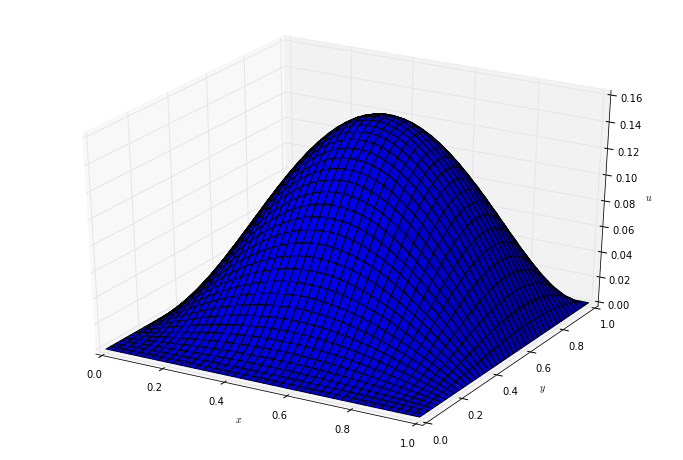

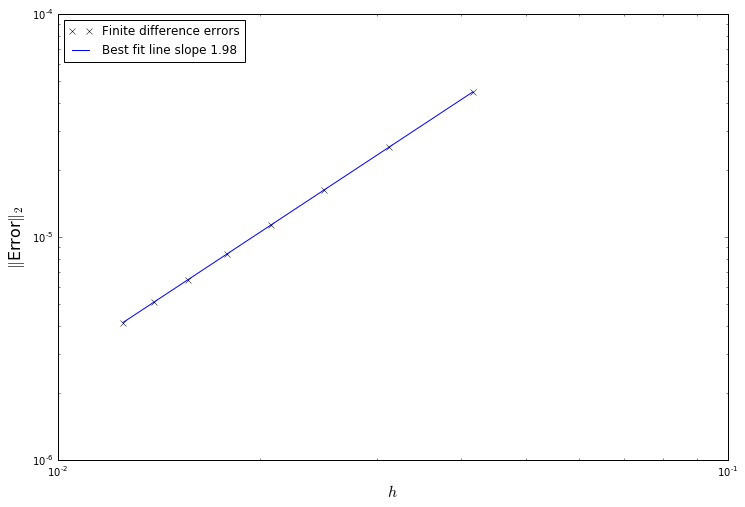

In [2]:
import numpy
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg

def poisson_FD(f, domain, N):
    """
    Solve Poisson's equation u_{xx} + u_{yy} = f(x, y) on the
    rectangular domain using (N[0], N[1]) interior points.
    """
    
    h = numpy.zeros(2)
    for d in range(2):
        h[d] = (domain[d, 1] - domain[d, 0]) / (N[d] + 1.0)
    alpha = (h[0] / h[1])**2
    
    # Grid
    x = numpy.linspace(domain[0, 0], domain[0, 1], N[0] + 2)
    y = numpy.linspace(domain[1, 0], domain[1, 1], N[1] + 2)
    
    u = numpy.zeros((N[0] + 2, N[1] + 2))
    
    # Set up the linear system problem
    # Diagonal entries
    A = numpy.diag(-2.0 * (1.0 + alpha) * numpy.ones(N[0] * N[1]))
    # RHS vector
    b = numpy.zeros(N[0] * N[1])
    for j in range(N[1]):
        for i in range(N[0]):
            # Find the index for natural ordering by columns
            k = j + N[1] * i
            # The value of the RHS
            b[k] = h[0]**2 * f(x[i+1], y[j+1])
            # Boundary conditions: in this case, 
            # the Dirichlet BCs are trivial, 
            # but leave in the code in case!
            if i == 0:
                b[k] -= 0
            elif i == N[0]-1:
                b[k] -= 0
            if j == 0:
                b[k] -= 0
            elif j == N[1]-1:
                b[k] -= 0
            # The Laplacian stencil (diagonal terms already set up)
            if i > 0:
                A[k - N[1], k] = 1.0
            if i < N[0] - 1:
                A[k + N[1], k] = 1.0
            if j > 0:
                A[k, k-1] = alpha
            if j < N[1] - 1:
                A[k, k+1] = alpha
    # System now set up: solve for the interior points
    u_interior = linalg.solve(A, b)
    # Now need to remap the vector solution to the array for output
    #u[1:-1, 1:-1] = u_interior.reshape(N[0], N[1])
    for j in range(N[1]):
        for i in range(N[0]):
            k = j + N[1] * i
            u[i+1, j+1] = u_interior[k]
    
    return x, y, u

def f_qn1(x, y):
    """
    Source term for the problem.
    """
    
    return numpy.sin(numpy.pi * y) * ( 2.0 - 6.0 * x - 
                                      (numpy.pi * x)**2 * (1.0 - x) )

def u_exact(x, y):
    """
    Exact solution for the problem.
    """
    
    return x**2 * (1.0 - x) * numpy.sin(numpy.pi * y)

# Now solve the actual problem

domain = numpy.array([[0.0, 1.0],[0.0, 1.0]])
N = [40, 40]

x, y, u = poisson_FD(f_qn1, domain, N)


X, Y = numpy.meshgrid(x, y)
fig = pyplot.figure(figsize = (12, 8), dpi = 50)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, u, rstride = 1, cstride = 1, linewidth = 1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$u$')

# Now do the convergence test

Npoints = numpy.array([8*i for i in range(3,11)])
err_1norm = numpy.zeros(len(Npoints))
for n in range(len(Npoints)):
    x, y, u = poisson_FD(f_qn1, domain, [Npoints[n], Npoints[n]])
    for j in range(Npoints[n]+2):
        for i in range(Npoints[n]+2):
            err_1norm[n] += (u[i, j] - u_exact(x[i], y[j]))**2
    err_1norm[n] = numpy.sqrt(err_1norm[n]) / Npoints[n]

# Best fit to the errors
h = 1.0 / Npoints
p = numpy.polyfit(numpy.log(h), numpy.log(err_1norm), 1)

fig = pyplot.figure(figsize = (12, 8), dpi = 50)
pyplot.loglog(h, err_1norm, 'kx')
pyplot.loglog(h, numpy.exp(p[1]) * h**(p[0]), 'b-')
pyplot.xlabel('$h$', size = 16)
pyplot.ylabel('$\|$Error$\|_2$', size = 16)
pyplot.legend(('Finite difference errors', 
               "Best fit line slope {:.3}".format(p[0])), 
              loc = "upper left")

pyplot.show()

## Coding Question 2

Implement a FTBS algorithm for the advection equation with periodic boundaries. Use a sine wave on $x \in [0,1]$ as initial data. Check how it converges with resolution.

### Answer Coding Question 2

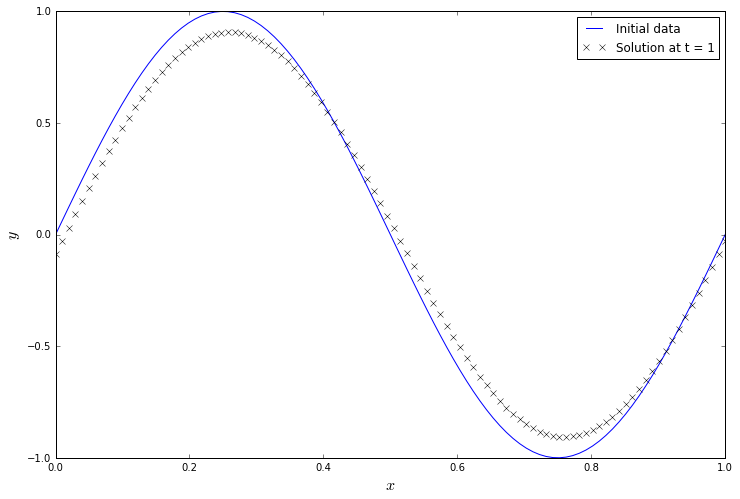

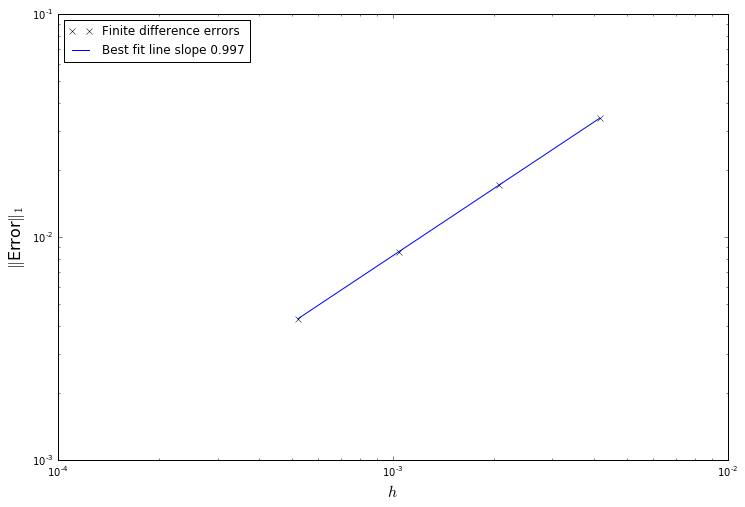

In [3]:
def FTBS(y0, domain, N = 100, t_end = 1.0, c = 0.5):
    """
    Solve the advection equation on a periodic domain using
    N+2 points in space.
    """
    
    h = (domain[1] - domain[0]) / (N + 1.0)
    x = numpy.linspace(domain[0], domain[1], N + 2)
    
    delta = c * h
    Nt = int(numpy.floor(t_end / delta))
    # If the timesteps don't perfectly divide the end time:
    if (Nt * delta < t_end):
        Nt += 1
    y = numpy.zeros((Nt+1, N+2))
    t = numpy.zeros(Nt+1)
    t[0] = 0.0
    y[0, :] = y0(x)
    
    for n in range(Nt):
        t[n+1] = t[n] + delta
        for i in range(1, N+1):
            y[n+1, i] = y[n, i] - c * (y[n, i] - y[n, i-1])
        # Impose boundary conditions
        y[n+1, 0] = y[n+1, -2]
        y[n+1, -1] = y[n+1, 1]
    # Do the final timestep
    delta = t_end - t[Nt-1]
    t[Nt] = t_end
    for i in range(1, N+1):
        y[-1, i] = y[-2, i] - delta / h * (y[-2, i] - y[-2, i-1])
    y[-1, 0] = y[-1, -2]
    y[-1, -1] = y[-1, 1]
    
    return t, x, y

def y0_qn2(x):
    """
    Initial data - sine wave.
    """
    
    return numpy.sin(2.0 * numpy.pi * x)

# Now produce the result for a single resolution

domain = [0.0, 1.0]

t, x, y = FTBS(y0_qn2, domain)

pyplot.figure(figsize = (12, 8), dpi = 50)
pyplot.plot(x, y[0, :], 'b-', x, y[-1, :], 'kx')
pyplot.xlabel('$x$', size = 16)
pyplot.ylabel('$y$', size = 16)
pyplot.legend(('Initial data', 'Solution at t = 1'))

# Now do the convergence test

levels = numpy.array(range(2, 6))
Npoints = 60 * 2**levels
err_1norm = numpy.zeros(len(Npoints))
for n in range(len(Npoints)):
    t, x, y = FTBS(y0_qn2, domain, Npoints[n])
    for i in range(Npoints[n]+2):
        err_1norm[n] += (y[0, i] - y[-1, i])**2
    err_1norm[n] = numpy.sqrt(err_1norm[n] / Npoints[n])

# Best fit to the errors
h = 1.0 / (Npoints + 1.0)
p = numpy.polyfit(numpy.log(h), numpy.log(err_1norm), 1)

fig = pyplot.figure(figsize = (12, 8), dpi = 50)
pyplot.loglog(h, err_1norm, 'kx')
pyplot.loglog(h, numpy.exp(p[1]) * h**(p[0]), 'b-')
pyplot.xlabel('$h$', size = 16)
pyplot.ylabel('$\|$Error$\|_1$', size = 16)
pyplot.legend(('Finite difference errors',
               "Best fit line slope {0:.3}".format(p[0])),
              loc = "upper left")

pyplot.show()

## Coding Question 3

Apply the FTBS algorithm to the traffic flow equation

$$
    \partial_t y + \partial_x \left( y ( 1 - y) \right) = 0.
$$

Use initial data $y(0, x) = \exp(-x^2)$, $y(0, x) = 0.2 + 1.2 H(x)$ and $y(0, x) = 1 - H(x)$ on $x \in [-10, 10]$ where $H(x)$ is the Heaviside step function. By comparing against the results for Burger's equation, explain your results. You may want to restrict to $t \leq 0.5$.

### Answer Coding Question 3

/Users/ih3/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:23: RuntimeWarning: overflow encountered in double_scalars
/Users/ih3/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in double_scalars


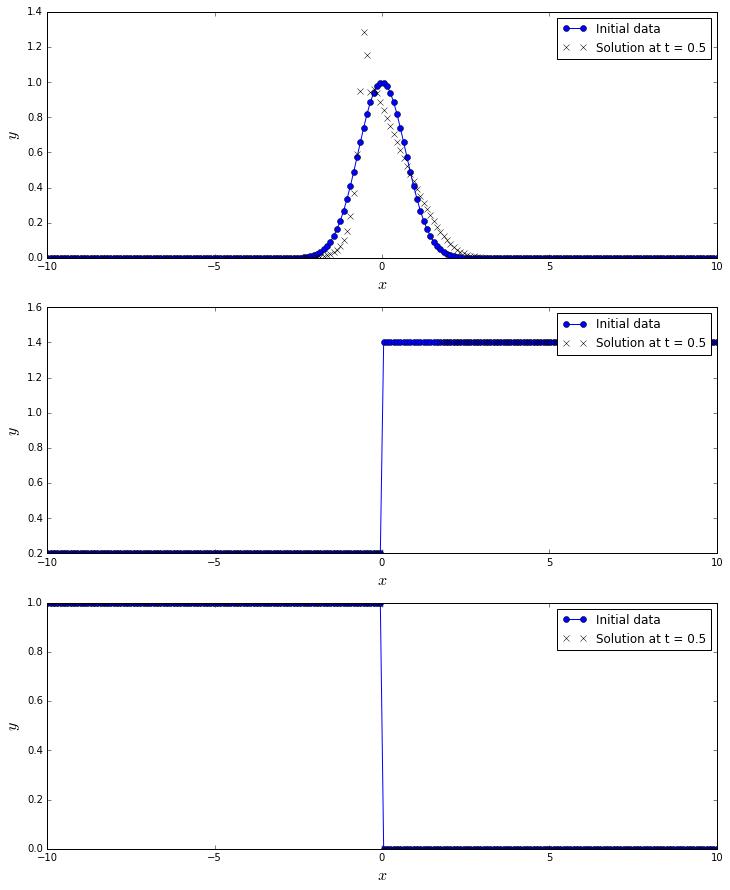

In [4]:
def FTBS_traffic(y0, domain, N = 200, t_end = 0.5, c = 0.25):
    """
    Solve the traffic flow equation on a fixed domain using N+2 points
    in space.
    """
    
    h = (domain[1] - domain[0]) / (N + 1.0)
    x = numpy.linspace(domain[0], domain[1], N + 2)
    
    delta = c * h
    Nt = int(numpy.floor(t_end / delta))
    # If the timesteps don't perfectly divide the end time:
    if (Nt * delta < t_end):
        Nt += 1
    y = numpy.zeros((Nt+1, N+2))
    t = numpy.zeros(Nt+1)
    t[0] = 0.0
    y[0, :] = y0(x)
    
    for n in range(Nt):
        t[n+1] = t[n] + delta
        for i in range(1, N+1):
            y[n+1, i] = y[n, i] - c * \
              (y[n, i] * (1.0 - y[n, i]) - y[n, i-1] * (1.0 - y[n, i-1]))
        # Impose outflow boundary conditions
        y[n+1, 0] = y[n, 0]
        y[n+1, -1] = y[n, -1]
    # Do the final timestep
    delta = t_end - t[Nt-1]
    t[Nt] = t_end
    for i in range(1, N+1):
        y[-1, i] = y[-2, i] - delta / h * \
          (y[-2, i] * (1.0 - y[-2, i]) - 
           y[-2, i-1] * (1.0 - y[-2, i-1]))
    y[-1, 0] = y[-2, 0]
    y[-1, -1] = y[-2, -1]
    
    return t, x, y

def y0_qn3_gaussian(x):
    """
    Initial data - Gaussian.
    """
    
    return numpy.exp(-x**2)

def heaviside(x):
    """
    Utility Heaviside function.
    """
    
    return 0.5 * (1.0 + numpy.sign(x))

def y0_qn3_heaviside1(x):
    """
    Initial data - 0.2 + 1.2 H(x).
    """
    
    return 0.2 + 1.2 * heaviside(x)

def y0_qn3_heaviside2(x):
    """
    Initial data - 1 - H(x).
    """
    
    return 1.0 - heaviside(x)

# Now produce the result for a single resolution

domain = [-10.0, 10.0]

t, x, y_gaussian   = FTBS_traffic(y0_qn3_gaussian  , domain)
t, x, y_heaviside1 = FTBS_traffic(y0_qn3_heaviside1, domain)
t, x, y_heaviside2 = FTBS_traffic(y0_qn3_heaviside2, domain)

pyplot.figure(figsize = (12, 15), dpi = 50)
pyplot.subplot(3, 1, 1)
pyplot.plot(x, y_gaussian[0, :], 'b-o', x, y_gaussian[-1, :], 'kx')
pyplot.xlabel('$x$', size = 16)
pyplot.ylabel('$y$', size = 16)
pyplot.legend(('Initial data', 'Solution at t = 0.5'))
pyplot.subplot(3, 1, 2)
pyplot.plot(x, y_heaviside1[0, :], 'b-o', x, y_heaviside1[-1, :], 'kx')
pyplot.xlabel('$x$', size = 16)
pyplot.ylabel('$y$', size = 16)
pyplot.legend(('Initial data', 'Solution at t = 0.5'))
pyplot.subplot(3, 1, 3)
pyplot.plot(x, y_heaviside2[0, :], 'b-o', x, y_heaviside2[-1, :], 'kx')
pyplot.xlabel('$x$', size = 16)
pyplot.ylabel('$y$', size = 16)
pyplot.legend(('Initial data', 'Solution at t = 0.5'))

pyplot.show()

The algorithm fails in the second case at the discontinuity. The results in the first case are also somewhat messy, but indicate that the discontinuity is appearing for $x<0$. This is to be expected, as the discontinuous wave should propagate to the left. From examining the characteristics for this equation, you should expect better results from FT**F**S - check this!